# Project Overview

In this time series analysis project I am attempting to project with 95% confidence the range of estimated gross loss for the Broadway show Wicked.
It goes without saying that March of 2020 all Broadway shows shut down until further notice.  This has turned into over a year now and with that year comes vast financial loss.  The question is, exactly how much?

I chose Wicked because since opening in 2003 it has experienced no interuptions except for Hurricaine Sandy, lasting one week. After 17 years of dealing with seasonal dips, rises in compesation wages for union workers, and new generations of fans they have figured out a formula that works.  

As interested as I am in their marketing scheme, their stable business model allows us to disregard things like major seasonal spikes and make accurate financial predictions.

# Imports

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import plotly.express as px

In [273]:
from pandas import datetime

# The Data

In [274]:
df = pd.read_excel('Broadway_Grosses.xlsx', index_col=0)

In [275]:
df.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2017-05-21,1984,Play,Hudson,4,0,212626,$,0.48,3378,NaN,0.87,0,Mystery,1,0
2017-05-28,1984,Play,Hudson,7,0,298438,212626,0.45,5079,3378.0,0.75,0,Mystery,1,0
2017-06-04,1984,Play,Hudson,8,0,282053,298438,0.36,5230,5079.0,0.67,0,Mystery,1,0
2017-06-11,1984,Play,Hudson,8,0,288446,282053,0.37,5554,5230.0,0.72,0,Mystery,1,0
2017-06-18,1984,Play,Hudson,8,0,301461,288446,0.39,6018,5554.0,0.78,0,Mystery,1,0


In [276]:
df['show'] = df['show'].str.capitalize()

In [277]:
df.shape

(8210, 15)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8210 entries, 2017-05-21 to 2015-02-22
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show              8190 non-null   object 
 1   type              8210 non-null   object 
 2   theatre           8210 non-null   object 
 3   previews          8210 non-null   int64  
 4   performances      8210 non-null   int64  
 5   grosses           8210 non-null   int64  
 6   prev_week_gross   8210 non-null   object 
 7   GG%GP             8210 non-null   float64
 8   attend            8210 non-null   int64  
 9   prev_week_attend  7997 non-null   float64
 10  %cap              8210 non-null   float64
 11  close_month       8210 non-null   int64  
 12  genre             8210 non-null   object 
 13  tony_noms         8210 non-null   int64  
 14  tony_awards       8210 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 1.0+ MB


In [279]:
df.isna().sum()

show                 20
type                  0
theatre               0
previews              0
performances          0
grosses               0
prev_week_gross       0
GG%GP                 0
attend                0
prev_week_attend    213
%cap                  0
close_month           0
genre                 0
tony_noms             0
tony_awards           0
dtype: int64

In [280]:
df = df.dropna()

In [281]:
df.shape

(7978, 15)

In [282]:
df_wicked = df[df.show.str.contains('Wicked')==True]

In [283]:
df_wicked.shape

(262, 15)

In [284]:
df_wicked.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2015-01-04,Wicked,Musical,Gershwin,0,8,2740642,2903309,1.63,15403,16257.0,1.00,0,Drama,10,3
2015-01-11,Wicked,Musical,Gershwin,0,8,1593224,2740642,0.95,13591,15403.0,0.94,0,Drama,10,3
2015-01-18,Wicked,Musical,Gershwin,0,8,1684664,1593224,1.00,14310,13591.0,0.99,0,Drama,10,3
2015-01-25,Wicked,Musical,Gershwin,0,8,1500725,1684664,0.89,14236,14310.0,0.98,0,Drama,10,3
2015-02-01,Wicked,Musical,Gershwin,0,8,1291035,1500725,0.77,12829,14236.0,0.89,0,Drama,10,3


# Visualizations

In [285]:
px.line(df_wicked, x=df_wicked.index, y='%cap')

In [286]:
px.line(df_wicked, x=df_wicked.index, y='grosses')

In [287]:
df_ts = df_wicked[['grosses']]

In [288]:
df_ts.head()

,grosses
date,
2015-01-04,2740642
2015-01-11,1593224
2015-01-18,1684664
2015-01-25,1500725
2015-02-01,1291035


In [289]:
df_ts.shape

(262, 1)

In [290]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2015-01-04 to 2020-01-05
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   grosses  262 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [291]:
df_ts.index[0]

Timestamp('2015-01-04 00:00:00')

<AxesSubplot:xlabel='date'>

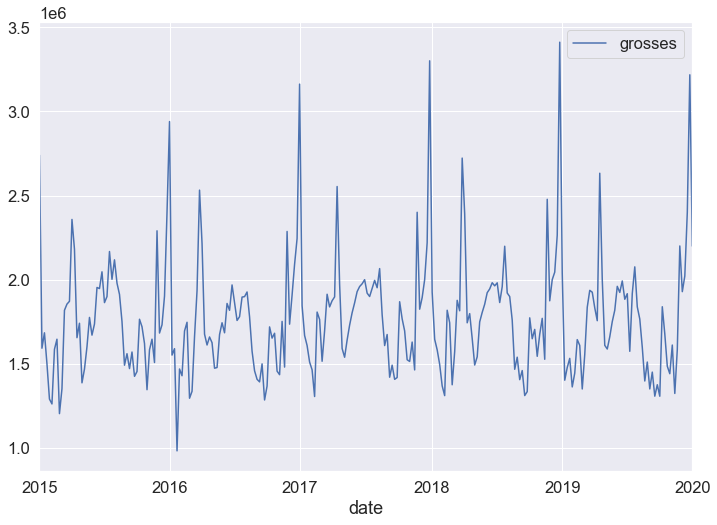

In [292]:
df_ts.plot()

# Time Series Checks

## Stationarity
#mean, variance and covariance is constant over periods of time.

In [293]:
gross_diff = df_ts.diff(periods=1)

In [294]:
gross_diff = gross_diff[1:]
gross_diff.head()

,grosses
date,
2015-01-11,-1147418.0
2015-01-18,91440.0
2015-01-25,-183939.0
2015-02-01,-209690.0
2015-02-08,-29018.0


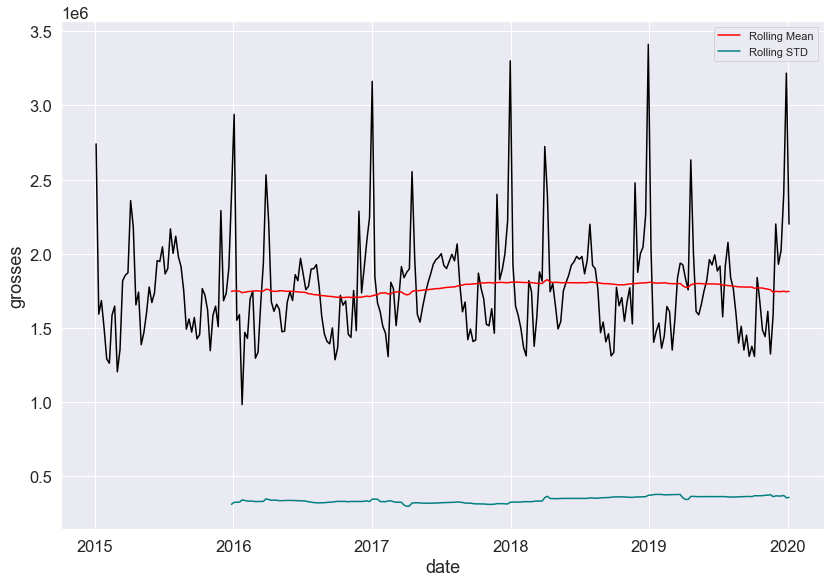

In [295]:
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x=df_ts.index, y=df_ts['grosses'],ax=ax, color='black')
sns.lineplot(x=df_ts.index, y=df_ts['grosses'].rolling(52).mean(),ax=ax, color='red', label='Rolling Mean')
sns.lineplot(x=df_ts.index, y=df_ts['grosses'].rolling(52).std(), color='teal',ax=ax, label='Rolling STD')

plt.tight_layout()
plt.show()

## Dickey Fuller Test

In [296]:

# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_ts['grosses'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.445684
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


An **Augmented Dickey Fuller** test was conducted. 

The hypotheses of these tests are:<br>

**𝐻0**: "Process has unit root".

**𝐻a**: "Process has **NO** unit root".<br> 

A **Unit Root** (also called a unit root process or a difference stationary process) is a stochastic trend in a time series, sometimes called a “random walk with drift”; If a time series has a unit root, it shows a systematic pattern that is unpredictable.

The test statistic is: **-7.445684**. Now you need to compare this with the critical values under 𝐻0. 

The **Critical Values** are given with:

1%:−3.456 | 5%:−2.873 | 10%:−2.573

Since your test statistic is lower than all of the critical values you can reject 𝐻0 at a significance level < 0.05 and accept 𝐻a. You can conclude that your time series has no unit root. Statistically speaking, your process is stationary. So, you reject 𝐻0.

In [297]:
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df_ts.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

<AxesSubplot:xlabel='grosses', ylabel='Count'>

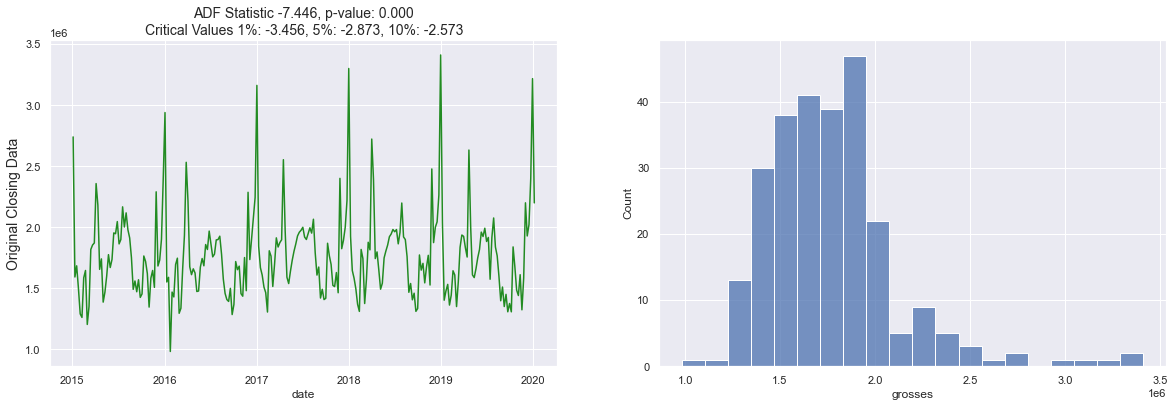

In [298]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df_ts['grosses'], 'Original Closing Data', ax[0])

sns.histplot(df_ts['grosses'], ax=ax[1])

This show has exceptional stionarity because of its well developed business model and therefore is easy to analyze.

## Seasonal Decomposition

In [299]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['grosses']

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

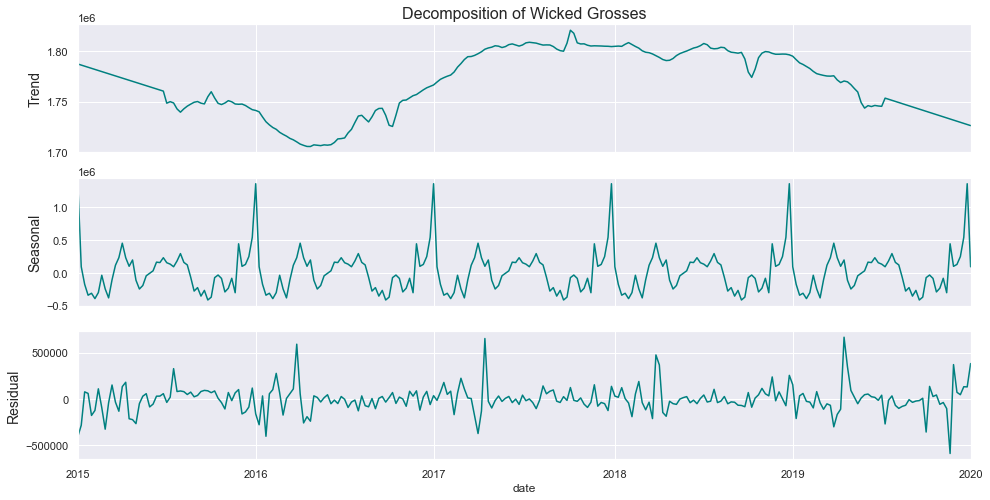

In [300]:
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,8))

res = seasonal_decompose(df_ts['grosses'], period=52, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of Wicked Grosses', fontsize=16)

res.trend.plot(ax=ax[0], legend=False, color='teal')
ax[0].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[1], legend=False, color='teal')
ax[1].set_ylabel('Seasonal', fontsize=14)
    
res.resid.plot(ax=ax[2], legend=False, color='teal')
ax[2].set_ylabel('Residual', fontsize=14)

plt.show()

## Auto Correlation

In [301]:
from statsmodels.graphics.tsaplots import plot_acf

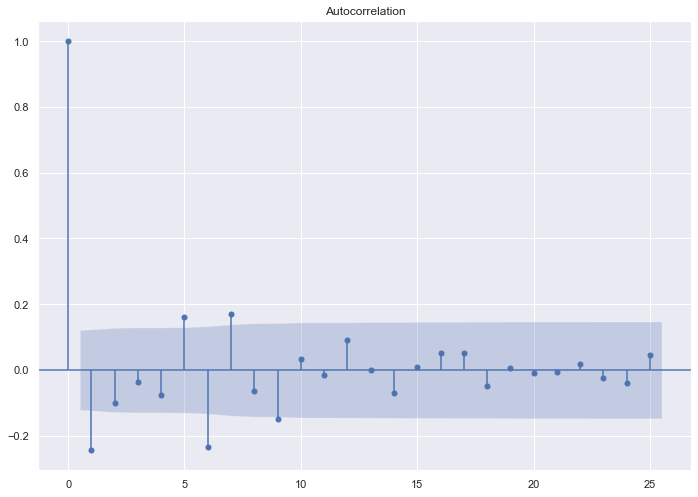

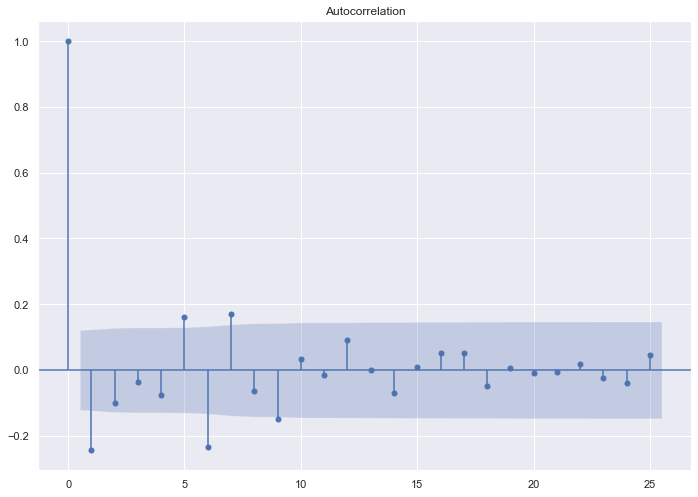

In [302]:
plot_acf(gross_diff)

# Creating Model

In [303]:
X = df_ts.values
train = X[0:230]
test = X[230:]

In [304]:
train.size

230

In [330]:
test.size

32

In [306]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

## Finding optimal p,d,q conditions

In [307]:
import itertools
p=d=q=range(0,5)

pdq = list(itertools.product(p,d,q))

In [308]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=(param))
        output = model_arima.fit()
        print(param,output.aic) 
    except:
        continue

(0, 0, 0) 6519.111611690941
(0, 0, 1) 6474.139461215581
(0, 0, 2) 6468.0461153181595
(0, 0, 3) 6466.989470693852
(0, 0, 4) 6464.70999463537
(0, 1, 0) 6503.864829428356
(0, 1, 1) 6483.464446188238
(0, 1, 2) 6453.105580236419
(0, 1, 3) 6446.948557181522
(0, 1, 4) 6445.778002360405
(0, 2, 0) 6679.5068554228865
(0, 2, 1) 6483.8166244369695
(0, 2, 2) 6464.560002731783
(0, 2, 3) 6440.247498755831
(0, 2, 4) 6433.554044680155
(1, 0, 0) 6465.728937552347
(1, 0, 1) 6467.687550834205
(1, 0, 2) 6469.124157332222
(1, 0, 3) 6458.053011456387
(1, 0, 4) 6458.511149307048
(1, 1, 0) 6491.497014157927
(1, 1, 1) 6444.533626027212
(1, 1, 2) 6446.503739188245
(1, 1, 3) 6447.96494592646
(1, 2, 0) 6597.429261254765
(1, 2, 1) 6471.961706753576
(2, 0, 0) 6467.678067532349
(2, 0, 1) 6458.601722639385
(2, 0, 2) 6457.6187902950205
(2, 0, 3) 6456.745481964534
(2, 0, 4) 6454.514584254523
(2, 1, 0) 6487.115730174444
(2, 1, 1) 6446.49682128156
(2, 1, 2) 6441.900395987293
(2, 1, 3) 6443.72264791582
(2, 1, 4) 6427.81797

## ARIMA Model

In [309]:
model_arima = ARIMA(train, order=(4,2,4))
output = model_arima.fit()

## Predictions

In [310]:
predictions = output.forecast(steps = 33)[0]
predictions

array([1422538.82362163, 1692556.14929283, 1656483.82306511,
       1563288.15319027, 1662159.54666028, 1611450.95386051,
       1660482.81697032, 1619327.58691623, 1644918.24139065,
       1667481.47683808, 1629646.16268562, 1672100.10192051,
       1657040.79026738, 1664931.89569235, 1675026.99709989,
       1669335.67264629, 1686744.62179467, 1680018.7738694 ,
       1691192.90116636, 1696043.63627749, 1696530.45975516,
       1707318.68552153, 1707470.56908743, 1715550.72743898,
       1719811.9530469 , 1724137.21621484, 1731436.96889934,
       1734522.80195528, 1741610.23215731, 1746317.00962999,
       1751694.68198782, 1757969.34459981, 1762710.09346604])

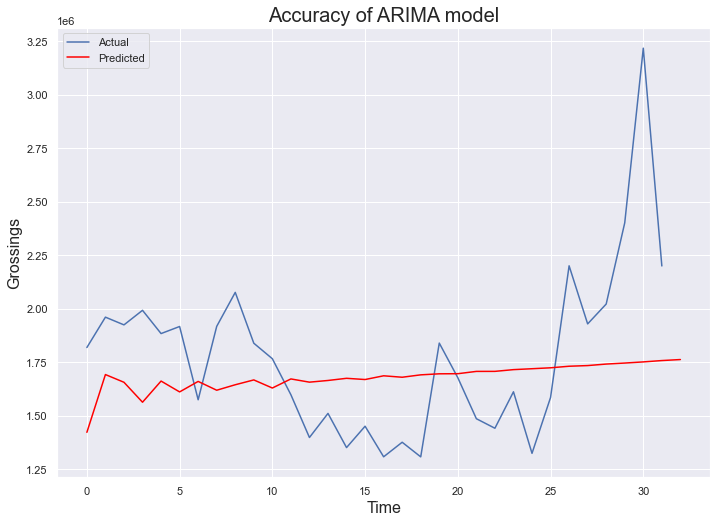

In [333]:
plt.plot(test, label = 'Actual')
plt.plot(predictions, color='red', label = 'Predicted')
plt.legend(loc='upper left')

plt.title("Accuracy of ARIMA model", fontsize=20)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Grossings", fontsize=16)

plt.show()

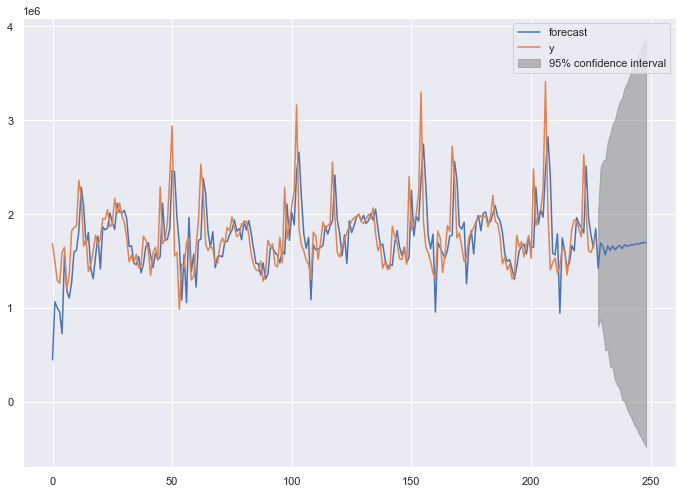

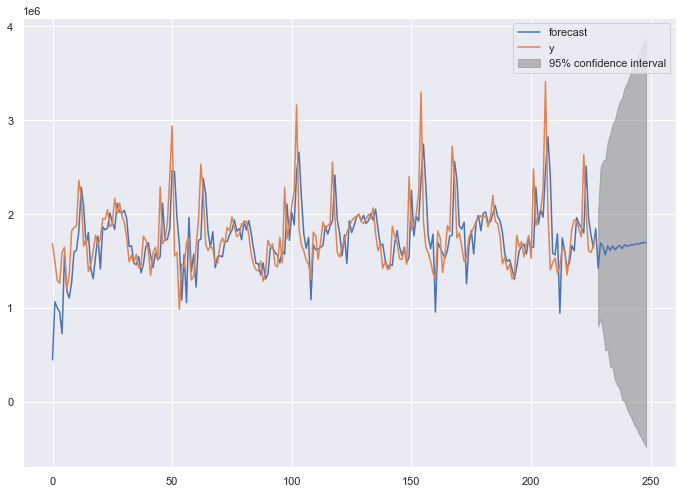

In [312]:
output.plot_predict(2, 250)

# Lost Grosses due to COVID-19

In [316]:
pred = output.forecast(steps = 85)[0]
predictions_sum = predictions.sum().round()
pred_sum = pred.sum().round()

print(predictions_sum, pred_sum)

55419850.0 156328817.0


In [318]:
covid_pred = pred_sum - predictions_sum
print(covid_pred)

100908967.0


In [339]:
print('The Broadway show Wicked lost approximately', covid_pred, 'U.S.D. in the first year of COVID-19.')

The Broadway show Wicked lost approximately 100908967.0 U.S.D. in the first year of COVID-19.


# Conclusion